1. Die Hauptaufgabe besteht darin festzustellen wann und wieso Mitarbeiter das Unternehmen verlassen. 
    - Eine ML-schreiben das durch das verhalten der Mitarbeiter erkennt wer als nächstes gehen könnte '


Welche Biblitheken nutze ich, zur Bearbeitung meiner Analyse 

In [301]:
# Diese Biblotheken sind zur Bearbeitung und Visualisierung 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# Hie später die Bibliotheken zur Erstellung der ML einfügen

# 1. ASK/Prepare
    - Spalten betrachen 
    - was muss sich ändern 
    - Welche Spalten sind wichtig
    - Einheitlichkeit überprüfen 
    - Mit welchen Datentypen arbeite ich 
    - Hat meine Datei identische Zeilen 
    - Index festlegen 
    
 

In [302]:
#Einlesung meiner Datei
df = pd.read_excel("HR_comma_sep Kopie.xlsm")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [303]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [304]:
#Spalten Namen sind nicht Einheitlich 
df = df.rename(columns={"satisfaction_level": "Satisfaction_Level",
                   "last_evaluation": "Last_Evaluation",
                   "number_project": "Number_Project",
                   "average_montly_hours": "Average_Monthly_Hours",
                   "time_spend_company": "Time_Spend_Company",
                   "left": "Left",
                   "promotion_last_5years": "Promotion_Last_5Years",
                   "salary": "Salary"

                   })

In [305]:
#Überprüfung der Daten (Objects = Strings)
df.dtypes

Satisfaction_Level       float64
Last_Evaluation          float64
Number_Project             int64
Average_Monthly_Hours      int64
Time_Spend_Company         int64
Work_accident              int64
Left                       int64
Promotion_Last_5Years      int64
Department                object
Salary                    object
dtype: object

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Satisfaction_Level     14999 non-null  float64
 1   Last_Evaluation        14999 non-null  float64
 2   Number_Project         14999 non-null  int64  
 3   Average_Monthly_Hours  14999 non-null  int64  
 4   Time_Spend_Company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   Left                   14999 non-null  int64  
 7   Promotion_Last_5Years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   Salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [307]:
df.sample(10)

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Monthly_Hours,Time_Spend_Company,Work_accident,Left,Promotion_Last_5Years,Department,Salary
4631,0.92,0.79,5,243,3,1,0,0,support,high
13720,0.75,0.87,4,146,8,1,0,0,support,low
13026,0.83,0.73,4,247,2,0,0,0,support,medium
9846,0.67,0.50,5,219,3,0,0,0,IT,medium
5578,0.47,0.55,2,156,2,0,0,0,management,medium
7564,0.95,0.90,2,129,5,0,0,0,marketing,medium
769,0.42,0.46,2,141,3,0,1,0,marketing,medium
6132,0.76,0.37,3,127,4,0,0,0,sales,medium
12791,0.82,0.49,4,276,4,0,0,0,support,low
6264,0.49,0.96,2,206,2,0,0,0,marketing,low


In [308]:
df.shape

(14999, 10)

In [309]:
#Überprüfung der Mitarbeiter Pro Abteilung 
df["Department"].value_counts()

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

2. Prepare 
    - Die oben genannten Punkte durchsetzen 
    - Alles einheitlich und dynamisch gestallten 

In [310]:
#duplicat(keep=True) => geht df durch merkt sich die  Zeilen falls eine zeile ein Duplicat ist gibt er diese aus 

dobbelvalues= df[df.duplicated()]
dobbelvalues

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Monthly_Hours,Time_Spend_Company,Work_accident,Left,Promotion_Last_5Years,Department,Salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [311]:
#Oben wurden die Doppeltenwerte ermittelt, wir haben sie unserer Dataframe entzogen 
df = df.drop_duplicates()
df



,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Monthly_Hours,Time_Spend_Company,Work_accident,Left,Promotion_Last_5Years,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [400]:
df.sample(60)

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Monthly_Hours,Time_Spend_Company,Work_accident,Left,Promotion_Last_5Years,Department,Salary
1643,0.09,0.83,6,295,5,0,1,0,technical,low
3301,0.49,0.69,2,147,2,0,0,0,sales,medium
755,0.37,0.48,2,160,3,0,1,0,product_mng,low
5491,0.78,0.90,4,104,4,0,0,0,RandD,low
8997,0.50,0.72,3,182,2,1,0,0,product_mng,medium
9397,0.49,0.83,3,172,2,0,0,0,sales,medium
9892,0.50,0.91,4,148,2,0,0,0,technical,medium
10585,0.79,0.77,3,201,6,1,0,0,support,medium
2746,0.94,0.90,2,263,3,0,0,0,RandD,low
5375,0.67,0.97,4,186,3,0,0,0,hr,low


In [312]:
#Überprüfung ob die df leere Zellen enthällt 
df.isnull().sum()

Satisfaction_Level       0
Last_Evaluation          0
Number_Project           0
Average_Monthly_Hours    0
Time_Spend_Company       0
Work_accident            0
Left                     0
Promotion_Last_5Years    0
Department               0
Salary                   0
dtype: int64

# 2. Analyse 
Left (Number_Project)<br>
    - Vergleich zwichen anzahl Projekten und verlassen desn Unternehmens<br>
    -  Vergleich zwischen Number Projects und Average Monthly Hours 



    

Text(0.5, 1.0, 'Number Project VS Left')

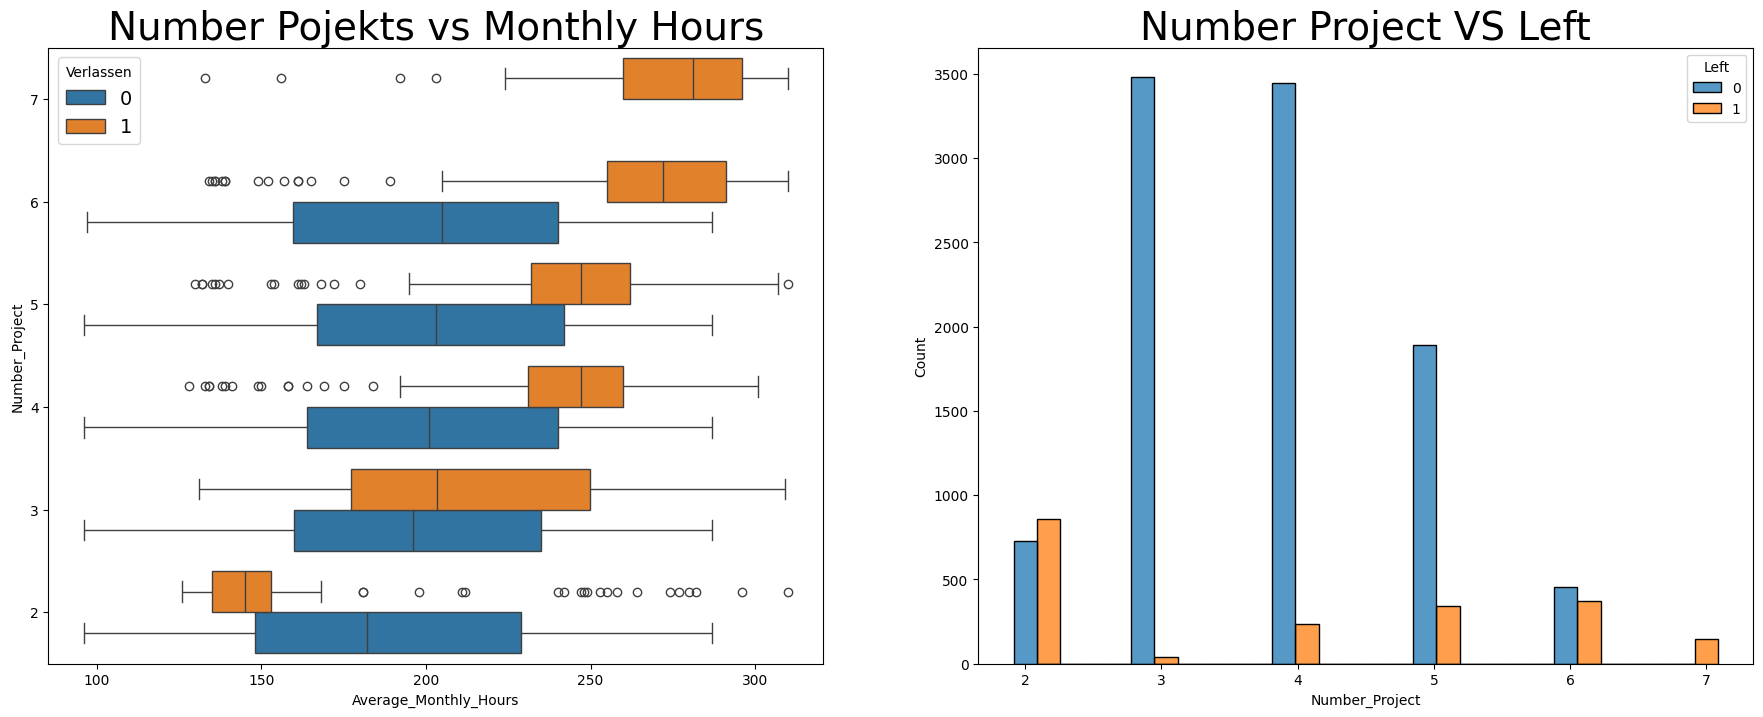

In [313]:
# bezieht sich auf alle Mitarbeiter der Firma 

#größe und axs bestimmen 
fig ,ax = plt.subplots(1,2, figsize=(22,8))

#Vergleich erstllen für ax[0] 
sns.boxplot(data=df,x="Average_Monthly_Hours",y="Number_Project",hue="Left", ax=ax[0],orient="h",)
ax[0].invert_yaxis()     #Ändert die Reihnfolge der y-Achse
ax[0].set_title("Number Pojekts vs Monthly Hours", fontsize =28)
#ax[0].label_outer()

#neulabels = ["bleibt","geht"]
ax[0].legend(title="Verlassen", fontsize=14)


#Vergleich der number_project mit Angestellten die geblieben sind und die die gegangen sind
stay = df[df["Left"] == 0]["Number_Project"]    #stay wird auf den Punkten von ["Number_Project"]  im Diagramm dargestellt 
left = df[df["Left"] == 1]["Number_Project"]    ##left wird auf den Punkten von ["Number_Project"]  im Diagramm dargestellt 

sns.histplot(data=df, x="Number_Project",hue="Left",ax=ax[1],multiple='dodge', shrink=2)
ax[1].set_title("Number Project VS Left", fontsize=28)




In [314]:
# Beweis für meine Annahme das alle Mitarbeiter die mir 7 Projekten belastet werden das Unternehmen verlassen

df[df["Number_Project"]==7]["Left"].value_counts()  #Nicht ganz Verstanden

Left
1    145
Name: count, dtype: int64

Hier erkennen wir ganz deutlich das Mitarbeiter die eine größere belastung ausgestzt sind auch das Unternehmen verlassen. <br>
    - Alle die eine Überdurchschnittlich hohe Atbeitszeit aufweisen und zeitlich mit 6 oder mehr Projekten belastet sind <br>
    - Epfehlenswert ist eine Belastung von 3- 4 Projekten 
    
    

Averagemonthly hours versus the satisfaction levels



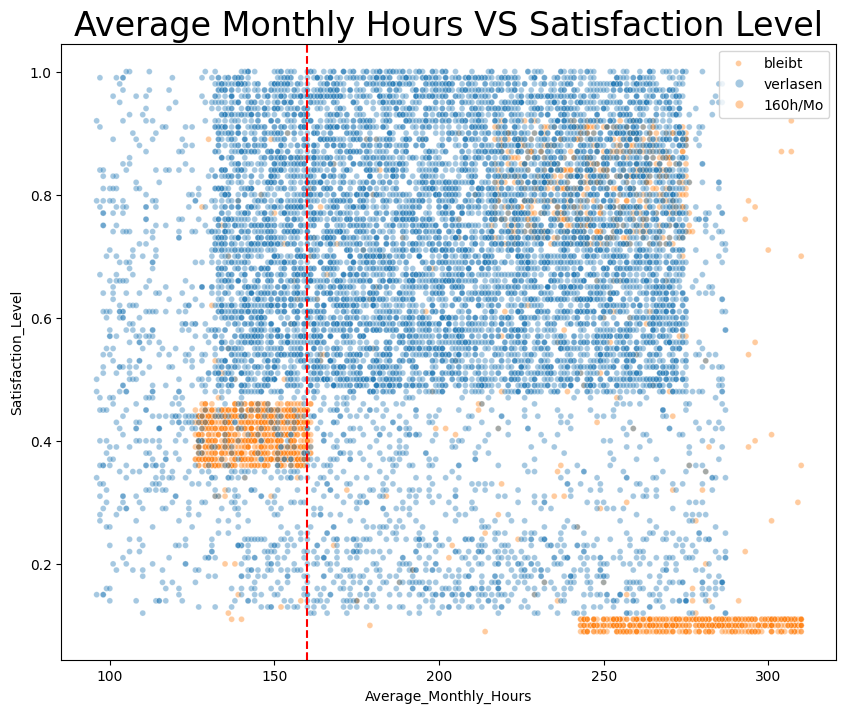

In [315]:
plt.figure(figsize=(10,8))  # Die Größe meines Diagramms wird festgeleft 
sns.scatterplot(data=df,x="Average_Monthly_Hours",size=24,y="Satisfaction_Level",hue="Left",alpha=0.4)  #Bedinungen/ Analyse 
plt.title("Average Monthly Hours VS Satisfaction Level",fontsize=24)  #Title 
plt.axvline(x=160,color="red", ls="--", label='160 h/mo')   #Einführung einer Senlrechten Linie zur Kennzeichnung der der Stunden eines normalen Arbeiters 
legend = plt.legend(labels=['bleibt', 'verlasen', "160h/Mo"])   #beschriftung der Legende 

#Legend noch bearbeiten



Ergebniss 
Es heben sich drei Felder besonders hervor 
1. Arbeiter die sehr viel Arbeiten und undglücklich 
2. Arbeiter die genau an der 160 Stunde an Grenzen, diese sind eventuell nicht genung ausgelastet 
3. Arbeiter die eine hohe arbeitszeit aufweisen und eine hohe zufriedenheits grad 


Satisfication_Level VS Time Spend in the company


Text(0.5, 1.0, 'Time Spend in Company VS LEFT')

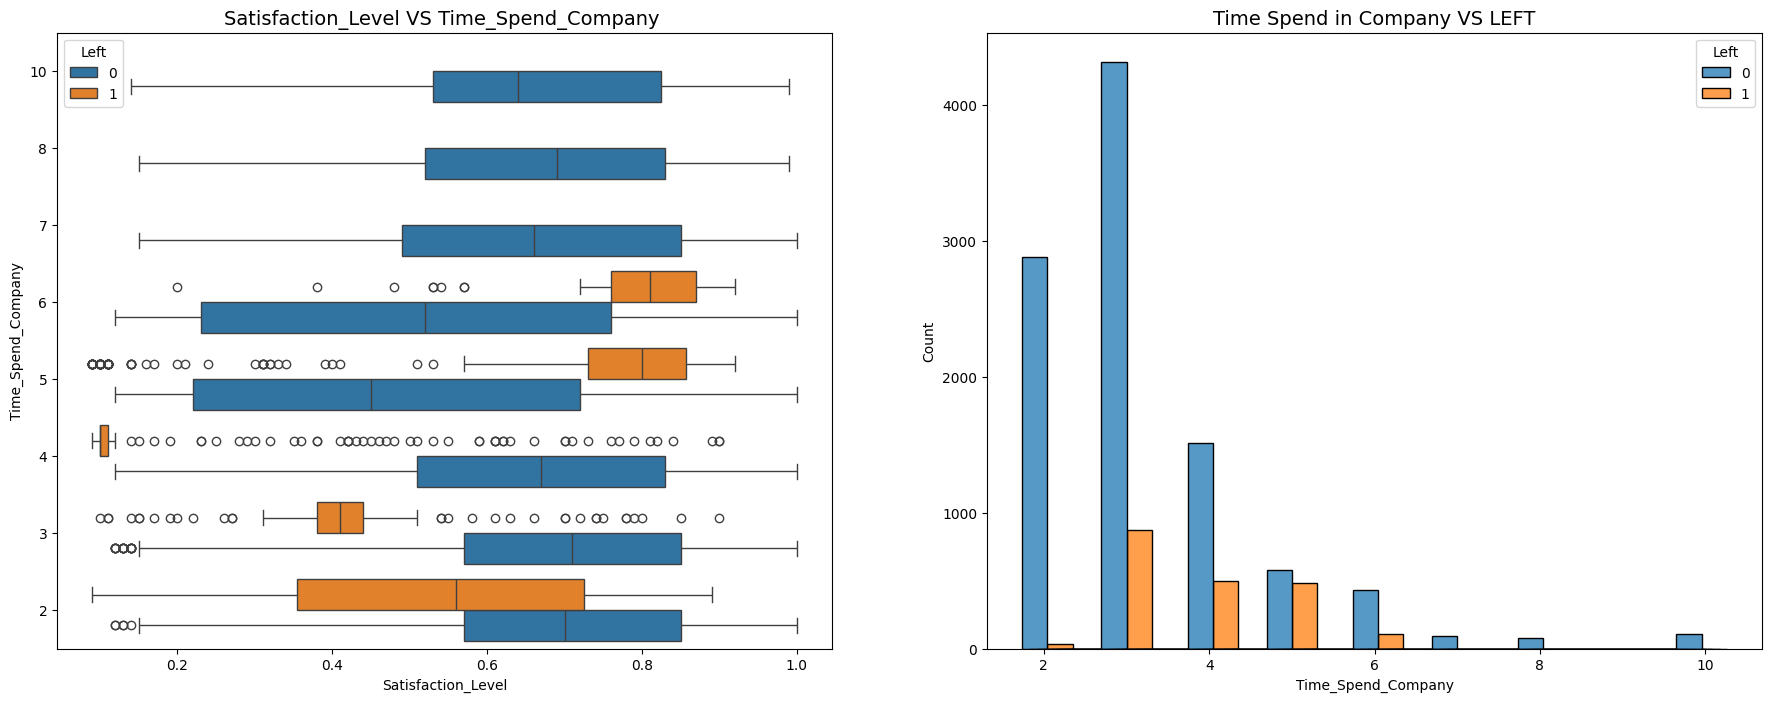

In [316]:
fig , ax=plt.subplots(1,2, figsize=(22,8))
sns.boxplot(data=df, x=df["Satisfaction_Level"], y="Time_Spend_Company",hue="Left", ax=ax[0], orient="h")
ax[0].invert_yaxis()  
ax[0].set_title("Satisfaction_Level VS Time_Spend_Company ",fontsize=14,)

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left


sns.histplot(data=df, x="Time_Spend_Company", hue=("Left"),multiple="dodge",shrink=7,ax=ax[1])
ax[1].set_title("Time Spend in Company VS LEFT",fontsize = 14)



Das Ergebniss <br>
Mitarbeiter die das Unernehmen verlassen tuen das in zwischen dem 6 und 1 Jahr. 
Alle Mitarbeiter die das 7Jahr erreicht haben sind verlassen nicht mehr das UNternehmen. 


In [412]:
# Hier wird das Satisfaction_Level der der Personen die das Unternehmen die verlassen(0,1 ) zusammengefast und durhc die agg Funktionen wieder ausgegeben
df.groupby("Left")["Satisfaction_Level"].agg(["mean","median"])


Text(0.5, 1.0, 'Time Spend Company >= 7')

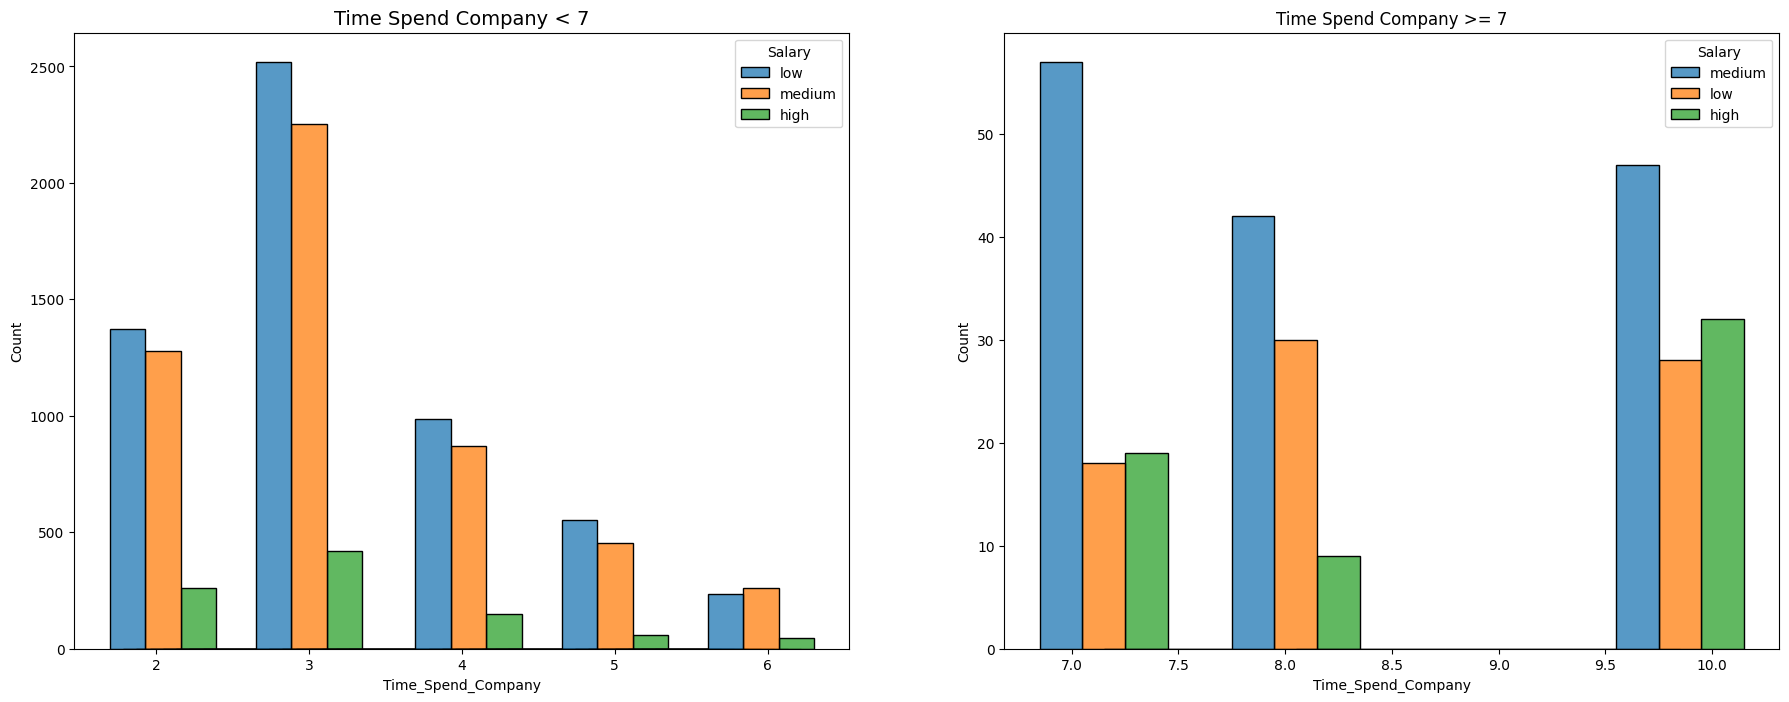

In [359]:
#Next, you could examine salary levels for different tenures.
#Salery vs Time Spend Company 
plt.subplots(1,2, figsize=(22,8))

# Timm_Spend_Company_Long/Short wurde als df festgehalten um es in einem plot wieder geben zu können
Time_Spend_Company_Long = df[df["Time_Spend_Company"] > 6]
Time_Spend_Company_Short = df[df["Time_Spend_Company"] <= 6]

sns.histplot(data=Time_Spend_Company_Long, x="Time_Spend_Company",hue="Salary",ax=ax[1],multiple="dodge",shrink=2)
ax[0].set_title("Time Spend Company < 7",fontsize=14)

sns.histplot(data=Time_Spend_Company_Short, x="Time_Spend_Company",hue="Salary",ax=ax[0],multiple="dodge",shrink=8)
ax[1].set_title("Time Spend Company >= 7")

Ergebiss <br>
Wir erkennen das es keine überpropotionale Bezahlung für Mitarbeiter gibt die länger im Unternehmen arbeiten. <br>



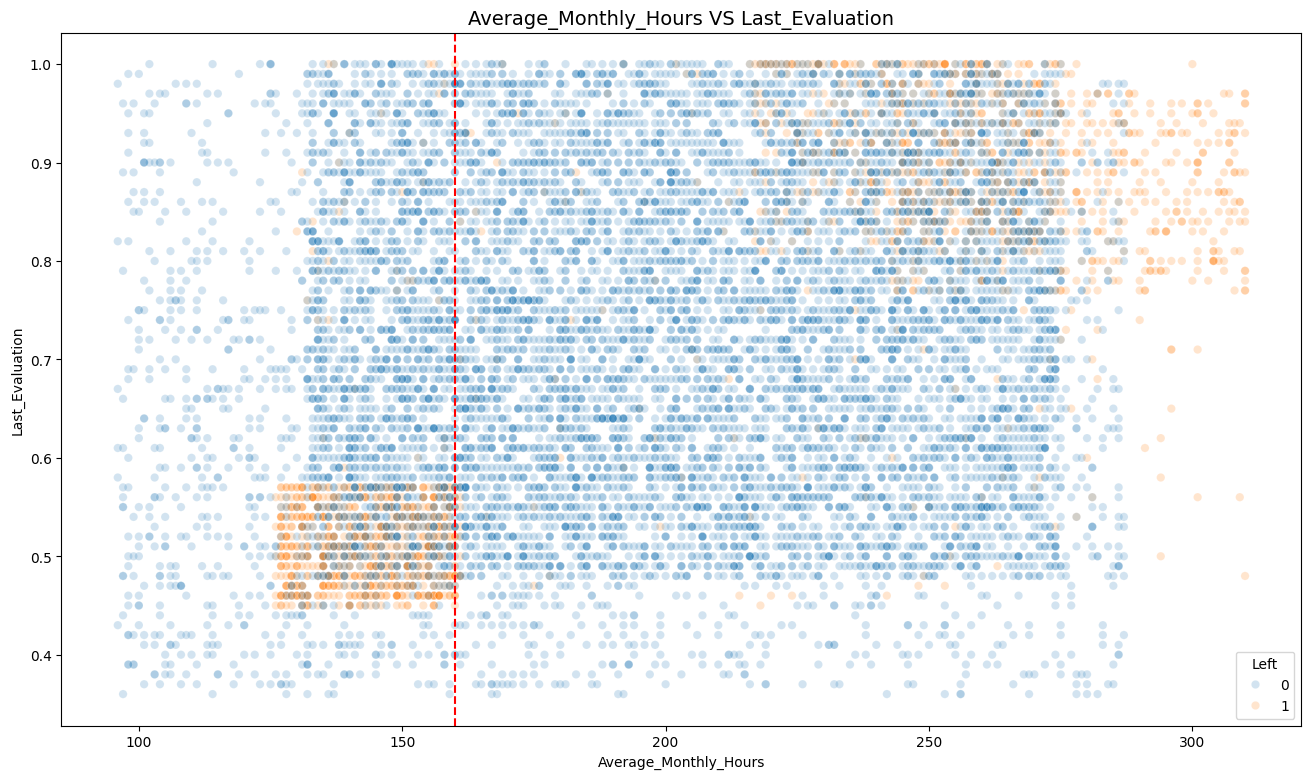

In [389]:
"""Next, you could explore whether there's a correlation between working long hours and receiving high 
    evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`."""

#average_monthly_hours` versus `last_evaluation
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x="Average_Monthly_Hours", y="Last_Evaluation",hue="Left",alpha=0.2)
plt.title("Average_Monthly_Hours VS Last_Evaluation",fontsize=14)
plt.axvline(x = 160,color="red", ls="--")

#Legende muss nich bearbeitet werden



Ergebniss <br>
Bei dem ersten Diagramm erkennen wir das es zwei Bereiche gibt, die eine Beziehung zu einander aufweisen. <br>
1. Die erste Gruppe weist eine hohe Bewertung auf, die zeite Gruppe weist eine niedrige Bewertung auf,beide Gruppen verlassen jedich die Firma. 
Das kann zur Folge haben das die erste Gruppe im Vergleich zur zweiten Gruppe fast doppelt soviel arbeitet. 




Text(0.5, 1.0, 'Average_Monthly_Hours VS Promotion_Last_5Years')

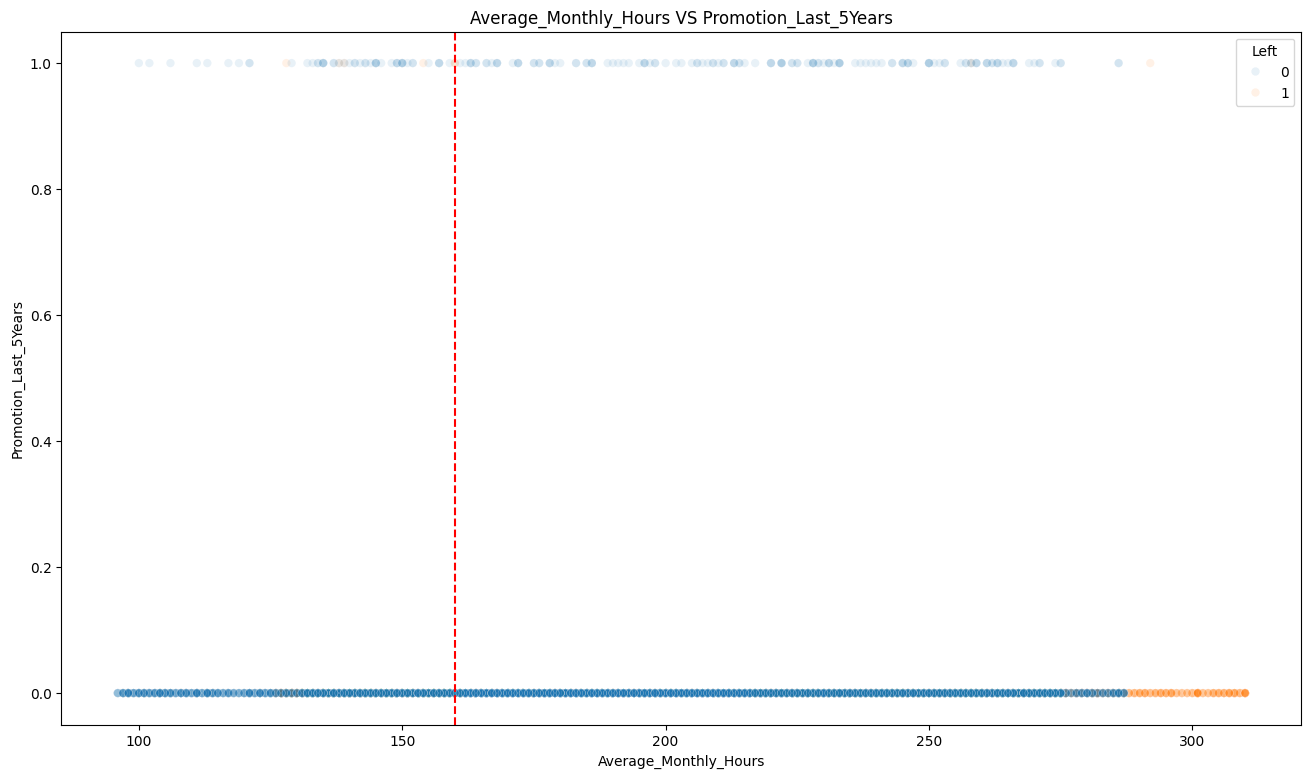

In [404]:
#Next, you could examine whether employees who worked very long hours were promoted in the last five years.
plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x="Average_Monthly_Hours", y="Promotion_Last_5Years",hue="Left",alpha=0.1)
plt.axvline(x=160,ls= "--",color="red")

plt.title("Average_Monthly_Hours VS Promotion_Last_5Years")

Ergebniss <br>
Was wir sehen können:<br>
    - Von den Mitarbeitern die eine Promotion bekommen haben gibt es nur sehr wenige die das Unternehmen verlassen haben. <br>
    -Es gibt aller dings sehr viele die keine Promotoin bekommen habeb und Zeitgleich eine sehr hohe Arbeitszeit aufweisen <br>
    - Es gibt auch 


In [424]:
#Next, you could inspect how the employees who left are distributed across departments.

# Hier erkennen wir wie viele der Mitarbeiter pro Department das Unternehmen verlassen haben und wie viele nicht, jedoch bekommen wir als Ergebniss eine Serie heraus

df.groupby("Left")["Department"].value_counts()

#Hier haben wir die Serie in ein Datafram umgewandelt, um damit im anschluss unsere Visualisierung fortsetzen zu können.
a = df.groupby("Left")["Department"].value_counts()


a = a.to_frame()
a



count
Left Department        
0    sales         2689
     technical     1854
     support       1509
     IT             818
     RandD          609
     product_mng    576
     marketing      561
     accounting     512
     hr             488
     management     384
1    sales          550
     technical      390
     support        312
     IT             158
     hr             113
     marketing      112
     product_mng    110
     accounting     109
     RandD           85
     management      52

In [434]:

df["Department"].value_counts()


Department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

Ergebiss<br>
Anhand dieser Abfrage erkennen wir ganz deutlich wie viele Mitarbeiter in den jeweiligen Abteilungen das Unternehmen verlassen haben und wie viele das Unternehmen nicht verlassen haben. 

Text(0.5, 1.0, 'The number of employees who left summarized by department')

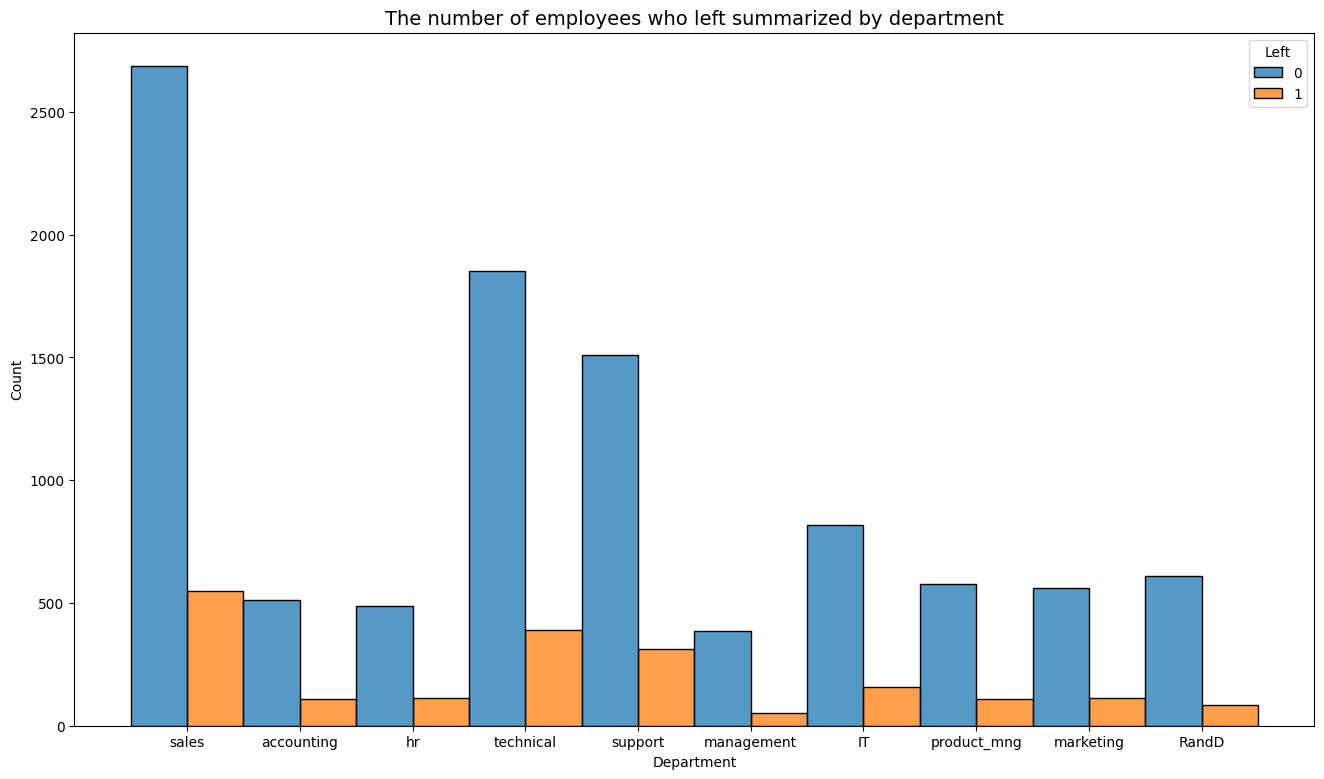

In [440]:
## Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(16,9))

sns.histplot(data=df,x="Department",hue="Left",multiple="dodge")
plt.title("The number of employees who left summarized by department",fontsize=14)



In [448]:
#Heatmap 
df1 = df.drop(["Salary","Department"],axis=1)
df1



,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Monthly_Hours,Time_Spend_Company,Work_accident,Left,Promotion_Last_5Years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1
11996,0.74,0.95,5,266,10,0,0,1
11997,0.85,0.54,3,185,10,0,0,1
11998,0.33,0.65,3,172,10,0,0,1


Text(0.5, 1.0, 'Stärke der einzelnen Spalten zu einander')

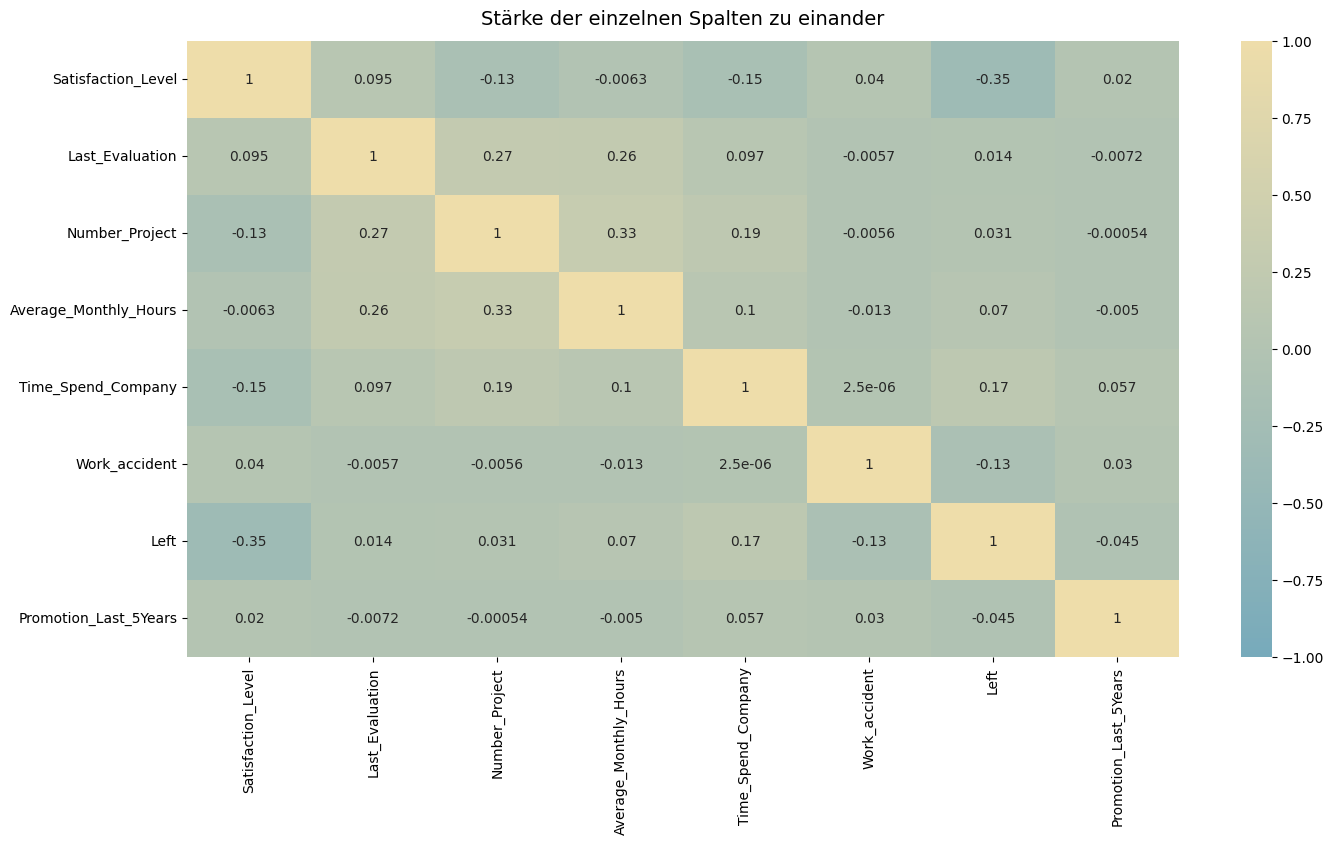

In [456]:
plt.figure(figsize=(16,8))

sns.heatmap(data=df1.corr(),vmax=1,vmin=-1,annot=True,cmap=sns.color_palette("blend:#7AB,#EDA", as_cmap=True))
plt.title("Stärke der einzelnen Spalten zu einander", fontsize=14, pad=12)

Ergebniss der Korelationsmatrix <br>
Wir erkennen das es eine  positive Korrelation von 0,33 zwischen Average Monthly Hours und Number Projekts gibt. <br>

Ausreißer Time_Spend_Company
- Was ist die Hauptfrage!!
- Was sagen mir die einzellnen Spalten

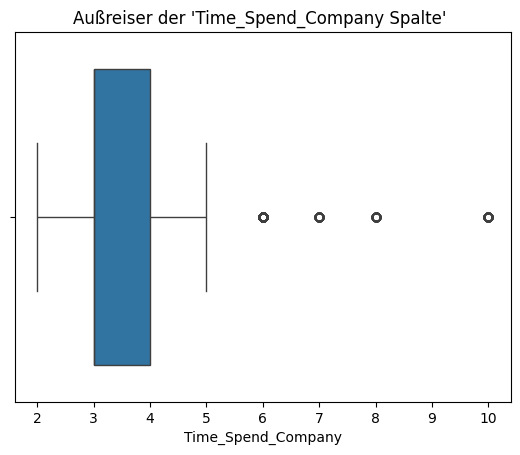

In [ ]:
"""Gibt es Sonderfälle was die Arbeitsdauer der Mirarbeiter in der Firma angeht
    ja, bei wem und wieso 
    nein, bei wem und wieso"""

#Nutzen Boxplot zur Feststellung von Ausreißern 
#palette="PuOr_r"


plt.title("Außreiser der 'Time_Spend_Company Spalte' ")
sns.boxplot(x = df["Time_Spend_Company"])
plt.show()




In [ ]:
"""  Anscheined gibt es einige Ausreiser 
    - ab wann ist jemand ein Ausreißer 
  wer sind SIE und wieso sind die solange dabei """

q1 = df["Time_Spend_Company"].quantile(0.25)

q3 = df["Time_Spend_Company"].quantile(0.75)
print(f"Q1 beträgt {q1} und Q3 beträgt {q3}")
print()

iqa = q3 -q1
print(f"Der Innere Quantile Abstand (iqa) beträgt {iqa}")
print()

"""iqa * 1,5 => das ist der Abstand von q1 nach unten(-) und von q3 nach oben(+) wo keine Ausreißer vorkommt
    Alles drüber oder drunter sind Ausreißer"""

# WICHTIG Zahlen die mit Komma werden mit NUMPy in Verbindung gebracht

upper_quantile = q3 + (iqa * 1.5)
lower_quantile = q1 - (iqa * 1.5)

print(f"Obere Fläche ist {upper_quantile} und untere Fläche ist {lower_quantile} alles darunter oder darüber hinaus sind Ausreißer")
print()

#outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

df_outliers = df[(df["Time_Spend_Company"] > upper_quantile) | (df["Time_Spend_Company"] < lower_quantile)]
 

#outliers.count()
    #Gibt mir die Spalten mit der Anzahl an Ausreißern 

count_of_outliers = len(df_outliers)

print(f"Wir haben insgesamt {count_of_outliers} Ausreißer")



Q1 beträgt 3.0 und Q3 beträgt 4.0

Der Innere Quantile Abstand (iqa) beträgt 1.0

Obere Fläche ist 5.5 und untere Fläche ist 1.5 alles darunter oder darüber hinaus sind Ausreißer

Wir haben insgesamt 824 Ausreißer


1. Beobachtung <br>
   <br> Es gibt nur Ausreißer die länger im UN gearbeitet es gibt keinen der unter 2 Jahre da war <br>
   <br> 1.Frage: Was hat sie solange gehalten <br>
   <br> 2.Frage: Wie sind ihre Werte im gegensatz zu Arbeiter die das Unternehmen nach kurzer Zeit verlassen haben<br>

In [ ]:
#Anzahl der ausreißer pro Department
df_outliers["Department"].value_counts()

Department
sales          242
technical      130
support        100
management      76
IT              61
marketing       56
product_mng     45
RandD           45
accounting      38
hr              31
Name: count, dtype: int64

In [ ]:
#Durchschnittliche Arbeitszeit eines Mitarbeiters 
df_outliers["Average_Monthly_Hours"].mean()

204.93203883495147

In [ ]:
df["Average_Monthly_Hours"].mean()

200.4735218080227

# Modeling 
Jetzt ist die Modelierung anzugehen. Hier zu muss ein Model entstehen das durch eingabe der Variablen einen Output(Left) herausgibt. 



In [476]:
# Spalten mir categorial data umwandel in numerical Spalten
#Bertriffen sind Deartment(non Ordinary) und Salery(ordinary)

#Duplikat erstellen um die DataFrame bearbeiten zu können 
df_enc = df.copy() 

#Salery werte zuweisel low<medim<high

#Spalte von categorie zu numerica umändern
df_enc["Salary"] = (
    df_enc["Salary"].
    astype("category").
    cat.set_categories(["low","medium","high"]).
    cat.codes
)

#Ersetzen in die Dummies durch 0 und q 
df_enc = pd.get_dummies(df_enc,drop_first=False)
df_enc = df_enc.replace(False, 0, inplace=False)
df_enc = df_enc.replace(True,1,inplace=False)

df_enc.head()

,Satisfaction_Level,Last_Evaluation,Number_Project,Average_Monthly_Hours,Time_Spend_Company,Work_accident,Left,Promotion_Last_5Years,Salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'Korrelation zwischen Variablen')

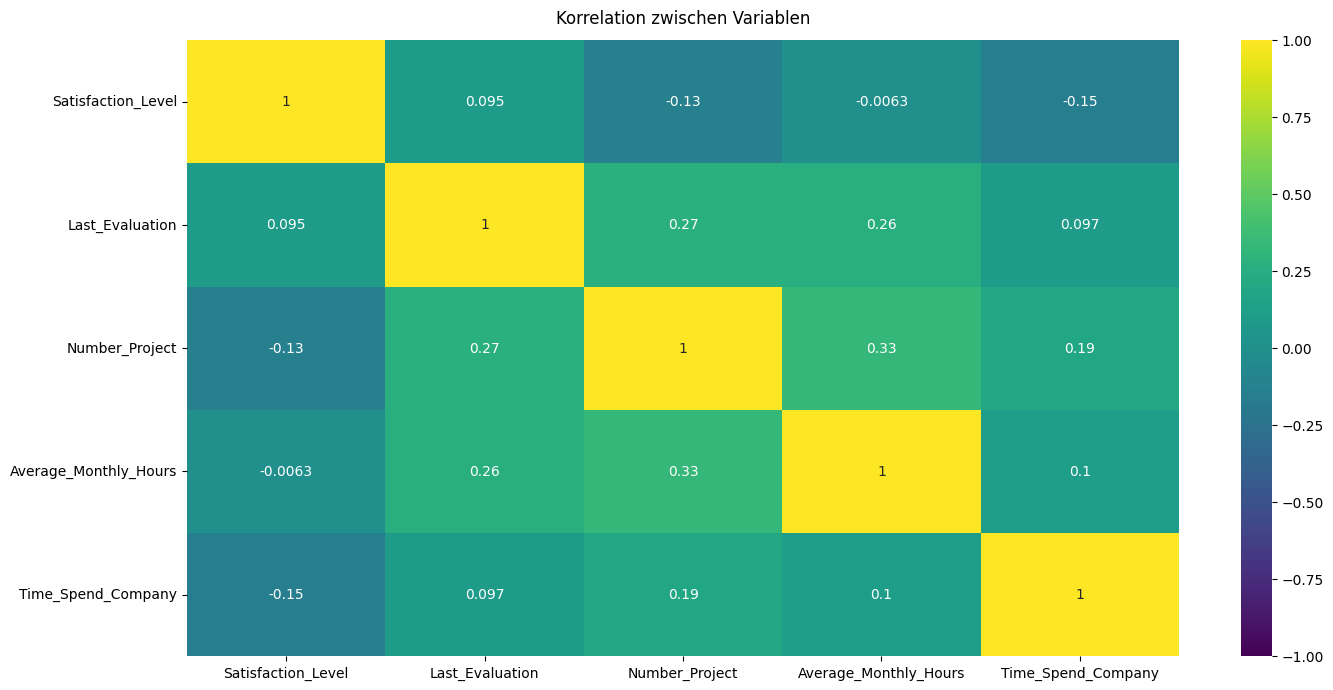

In [491]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(16,8))
sns.heatmap(data=df_enc[["Satisfaction_Level","Last_Evaluation","Number_Project","Average_Monthly_Hours","Time_Spend_Company"]].
            corr(),
            vmax=1,
            vmin=-1,
            cmap= sns.color_palette("viridis", as_cmap=True),
            annot=True
        
            )
plt.title("Korrelation zwischen Variablen", pad=12)


Text(0, 0.5, 'Employee Count')

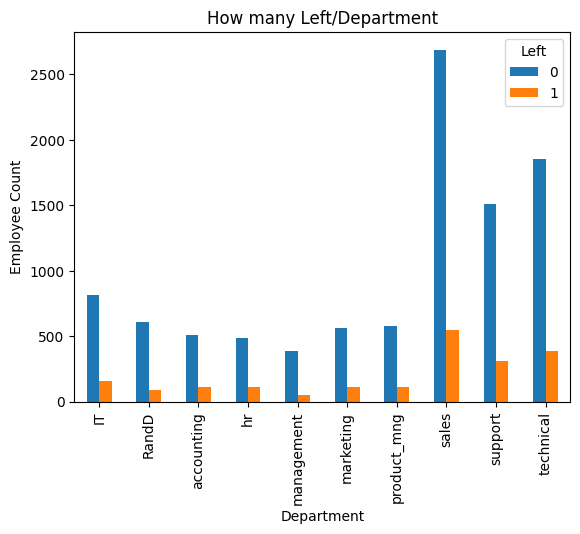

In [498]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df["Department"],df["Left"]).plot(kind="bar")
plt.title("How many Left/Department")
plt.xlabel("Department")
plt.ylabel("Employee Count")

#Haben eine zusammenfassung der Arbeiter die das Unternehmen verlassen haben bezogen auf die einzelnen Abteilungen

